# DATAFRAME 1

## MEAN ANNUAL EARNINGS IRELAND 2007-2009

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Mean Annual Earnings.csv')
df1.head(10)

,Sex,Private or Public Sector,Year,Statistic Label,UNIT,VALUE
0,Both sexes,Private sector,2007,Basic Annual Earnings,Euro,32995
1,Both sexes,Private sector,2007,Annual Bonuses and Benefit in Kind,Euro,2211
2,Both sexes,Private sector,2007,Total Annual Earnings,Euro,35206
3,Both sexes,Private sector,2008,Basic Annual Earnings,Euro,35995
4,Both sexes,Private sector,2008,Annual Bonuses and Benefit in Kind,Euro,2762
5,Both sexes,Private sector,2008,Total Annual Earnings,Euro,38756
6,Both sexes,Private sector,2009,Basic Annual Earnings,Euro,35147
7,Both sexes,Private sector,2009,Annual Bonuses and Benefit in Kind,Euro,2168
8,Both sexes,Private sector,2009,Total Annual Earnings,Euro,37315
9,Both sexes,Public sector,2007,Basic Annual Earnings,Euro,44541


## EDA

In [3]:
df1.shape

(81, 6)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       81 non-null     object
 1   Private or Public Sector  81 non-null     object
 2   Year                      81 non-null     int64 
 3   Statistic Label           81 non-null     object
 4   UNIT                      81 non-null     object
 5   VALUE                     81 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [5]:
df1.isnull().sum()

Sex                         0
Private or Public Sector    0
Year                        0
Statistic Label             0
UNIT                        0
VALUE                       0
dtype: int64

In [6]:
def get_unique(df, n_max = 5):
  for col in df.columns:
    print('-----------------')
    print(f'COLUMN: {col}')
    Value = df[col].unique()

    if len(Value) < n_max:
      for v in Value:
        print(f'  > {v}')

    else:
      print(f'  > More than {n_max} ({len(Value)} values)')

In [7]:
get_unique(df = df1, n_max = 5)

-----------------
COLUMN: Sex
  > Both sexes
  > Male
  > Female
-----------------
COLUMN: Private or Public Sector
  > Private sector
  > Public sector
  > All sectors
-----------------
COLUMN: Year
  > 2007
  > 2008
  > 2009
-----------------
COLUMN: Statistic Label
  > Basic Annual Earnings
  > Annual Bonuses and Benefit in Kind
  > Total Annual Earnings
-----------------
COLUMN: UNIT
  > Euro
-----------------
COLUMN: VALUE
  > More than 5 (81 values)


In [8]:
def get_dados(df, year=2007):
    df = df[df['Year'] == year]

    print(f'YEAR: {year}\n')

    for sector in df['Private or Public Sector'].unique():
        print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
        print(f'Sector: {sector}')
        for statistic in df['Statistic Label'].unique():
            print(f'  > {statistic}')
            dff = df[(df['Private or Public Sector'] == sector) & (df['Statistic Label'] == statistic)]

            m_value = dff[dff['Sex'] == 'Male']['VALUE'].values[0]
            f_value = dff[dff['Sex'] == 'Female']['VALUE'].values[0]
            dif_m_f = f_value - m_value
            perc_m_f = (f_value / m_value) - 1

            print(f"      > Female: {f_value :,.0f}")
            print(f"      > Male: {m_value:,.0f}")
            print(f"      > Dif : {dif_m_f:,.0f}")
            print(f"      > Perc : {perc_m_f:,.2%}")

        print('\n')

    print("Summary Statistics by Sex:")
    print(df.groupby('Sex')['VALUE'].describe())

In [9]:
get_dados(df1, 2007)

YEAR: 2007

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 26,055
      > Male: 37,926
      > Dif : -11,871
      > Perc : -31.30%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,325
      > Male: 2,841
      > Dif : -1,516
      > Perc : -53.36%
  > Total Annual Earnings
      > Female: 27,380
      > Male: 40,767
      > Dif : -13,387
      > Perc : -32.84%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 39,591
      > Male: 52,273
      > Dif : -12,682
      > Perc : -24.26%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,190
      > Male: 2,771
      > Dif : -1,581
      > Perc : -57.06%
  > Total Annual Earnings
      > Female: 40,781
      > Male: 55,045
      > Dif : -14,264
      > Perc : -25.91%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 30,11

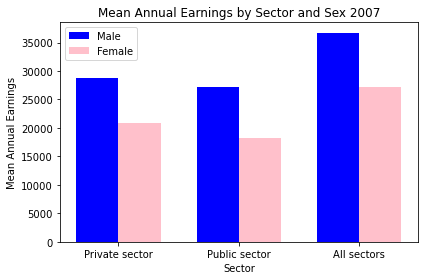

In [10]:
df_2007 = df1[df1['Year'] == 2007]

mean_male = df_2007[df_2007['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2007[df_2007['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2007['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2007')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()


In [11]:
get_dados(df1, 2008)

YEAR: 2008

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 28,446
      > Male: 41,790
      > Dif : -13,344
      > Perc : -31.93%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,839
      > Male: 3,470
      > Dif : -1,631
      > Perc : -47.00%
  > Total Annual Earnings
      > Female: 30,285
      > Male: 45,260
      > Dif : -14,975
      > Perc : -33.09%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 39,455
      > Male: 54,260
      > Dif : -14,805
      > Perc : -27.29%
  > Annual Bonuses and Benefit in Kind
      > Female: 657
      > Male: 2,360
      > Dif : -1,703
      > Perc : -72.16%
  > Total Annual Earnings
      > Female: 40,112
      > Male: 56,620
      > Dif : -16,508
      > Perc : -29.16%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 32,433


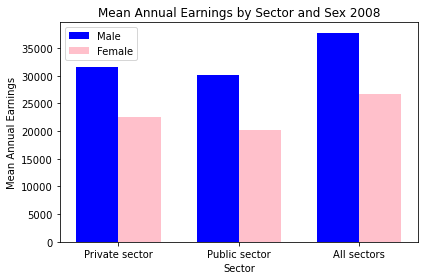

In [12]:
df_2008 = df1[df1['Year'] == 2008]

mean_male = df_2008[df_2008['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2008[df_2008['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2008['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2008')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()

In [13]:
get_dados(df1, 2009)

YEAR: 2009

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 27,997
      > Male: 41,421
      > Dif : -13,424
      > Perc : -32.41%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,318
      > Male: 2,913
      > Dif : -1,595
      > Perc : -54.75%
  > Total Annual Earnings
      > Female: 29,316
      > Male: 44,333
      > Dif : -15,017
      > Perc : -33.87%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 41,448
      > Male: 54,985
      > Dif : -13,537
      > Perc : -24.62%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,198
      > Male: 2,620
      > Dif : -1,422
      > Perc : -54.27%
  > Total Annual Earnings
      > Female: 42,646
      > Male: 57,605
      > Dif : -14,959
      > Perc : -25.97%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 32,65

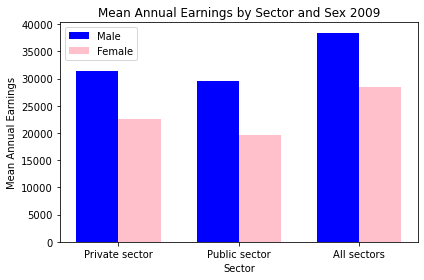

In [14]:
df_2009 = df1[df1['Year'] == 2009]

mean_male = df_2009[df_2009['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2009[df_2009['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2009['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2009')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()

In [15]:
def plot_mean_annual(df, years=[2007, 2008, 2009]):
    dft = df1[df1['Year'].isin(years)]

    pivot_table = dft.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='mean')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pivot_table, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')
    plt.show()

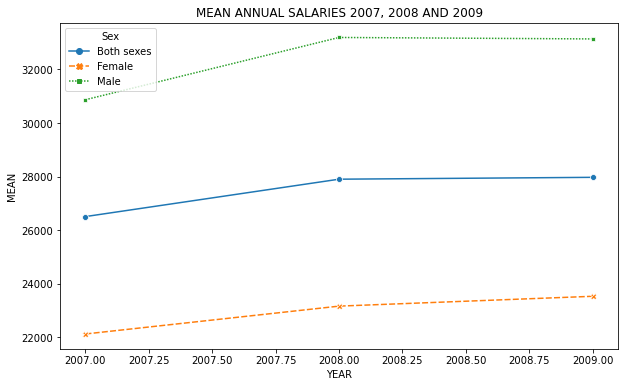

In [16]:
plot_mean_annual(df1)

In [17]:
fil_df = df1[(df1['Statistic Label'] == 'Basic Annual Earnings') 
                  & (df1['Year'].isin([2007, 2008, 2009]))
                  & (df1['Private or Public Sector'].isin(['Private sector', 'Public sector']))]

pivot_df = fil_df.pivot_table(index=['Year', 'Private or Public Sector'], columns='Sex', values='VALUE', aggfunc='mean')

pivot_df['Difference (%)'] = ((pivot_df['Female'] - pivot_df['Male']) / pivot_df['Male']) * 100

print(pivot_df)

Sex                            Both sexes  Female   Male  Difference (%)
Year Private or Public Sector                                           
2007 Private sector                 32995   26055  37926      -31.300427
     Public sector                  44541   39591  52273      -24.261091
2008 Private sector                 35995   28446  41790      -31.931084
     Public sector                  44760   39455  54260      -27.285293
2009 Private sector                 35147   27997  41421      -32.408682
     Public sector                  46455   41448  54985      -24.619442


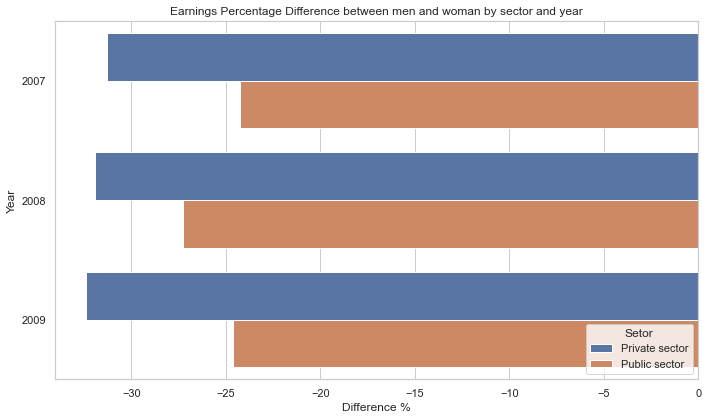

In [18]:
pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.sort_values(by='Difference (%)', ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Difference (%)', y='Year', hue='Private or Public Sector', data=pivot_df, orient='h')
plt.xlabel("Difference %")
plt.ylabel("Year")
plt.title("Earnings Percentage Difference between men and woman by sector and year")
plt.legend(title="Setor", loc='lower right')
plt.tight_layout()
plt.show()

In [19]:
fil_df1 = df1[(df1['Statistic Label'] == 'Annual Bonuses and Benefit in Kind') 
                  & (df1['Year'].isin([2007, 2008, 2009]))
                  & (df1['Private or Public Sector'].isin(['Private sector', 'Public sector']))]

pivot_df1 = fil_df1.pivot_table(index=['Year', 'Private or Public Sector'], columns='Sex', values='VALUE', aggfunc='mean')

pivot_df1['Difference (%)'] = ((pivot_df1['Female'] - pivot_df1['Male']) / pivot_df1['Male']) * 100

print(pivot_df1)

Sex                            Both sexes  Female  Male  Difference (%)
Year Private or Public Sector                                          
2007 Private sector                  2211    1325  2841      -53.361492
     Public sector                   1807    1190  2771      -57.055215
2008 Private sector                  2762    1839  3470      -47.002882
     Public sector                   1268     657  2360      -72.161017
2009 Private sector                  2168    1318  2913      -54.754549
     Public sector                   1724    1198  2620      -54.274809


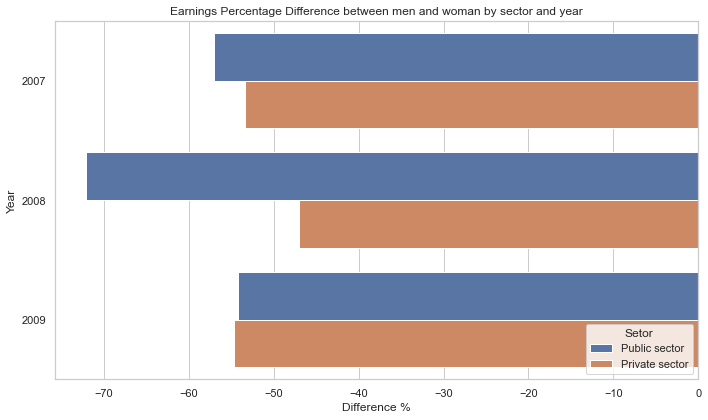

In [20]:
pivot_df1.reset_index(inplace=True)
pivot_df1 = pivot_df1.sort_values(by='Difference (%)', ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Difference (%)', y='Year', hue='Private or Public Sector', data=pivot_df1, orient='h')
plt.xlabel("Difference %")
plt.ylabel("Year")
plt.title("Earnings Percentage Difference between men and woman by sector and year")
plt.legend(title="Setor", loc='lower right')
plt.tight_layout()
plt.show()

In [21]:
df_private = df1[(df1['Private or Public Sector'] == 'Private sector') & 
                (df1['Statistic Label'] == 'Total Annual Earnings')]


df_public = df1[(df1['Private or Public Sector'] == 'Public sector') & 
                (df1['Statistic Label'] == 'Total Annual Earnings')]

df_private_male = df_private[df_private['Sex'] == 'Male']
X_private_male = df_private_male['Year'].values.reshape(-1, 1)
y_private_male = df_private_male['VALUE'].values

mpm = LinearRegression()
mpm.fit(X_private_male, y_private_male)

coefm = mpm.coef_[0]
interm = mpm.intercept_

private_men = mpm.predict([[2010]])
print('Total annual earnings for men in the private sector in 2010:', private_men[0])



df_private_female = df_private[df_private['Sex'] == 'Female']
X_private_female = df_private_female['Year'].values.reshape(-1, 1)
y_private_female = df_private_female['VALUE'].values

mpf = LinearRegression()
mpf.fit(X_private_female, y_private_female)

coeff = mpf.coef_[0]
interf = mpf.intercept_

private_women = mpf.predict([[2010]])
print('Total annual earnings for women in the private sector in 2010:', private_women[0])





df_public_male = df_public[df_public['Sex'] == 'Male']
X_public_male = df_public_male['Year'].values.reshape(-1, 1)
y_public_male = df_public_male['VALUE'].values

mpum = LinearRegression()
mpum.fit(X_public_male, y_public_male)

coefpm = mpum.coef_[0]
interpm = mpum.intercept_

public_men = mpum.predict([[2010]])
print('Total annual earnings for men in the public sector in 2010:', public_men[0])


df_public_female = df_public[df_public['Sex'] == 'Female']
X_public_female = df_public_female['Year'].values.reshape(-1, 1)
y_public_female = df_public_female['VALUE'].values

mpuf = LinearRegression()
mpuf.fit(X_public_female, y_public_female)


coefpuf = mpuf.coef_[0]
interpuf = mpuf.intercept_

public_women = mpuf.predict([[2010]])
print('Total annual earnings for women in the public sector in 2010:', public_women[0])


Total annual earnings for men in the private sector in 2010: 47019.33333333349
Total annual earnings for women in the private sector in 2010: 30929.666666666744
Total annual earnings for men in the public sector in 2010: 58983.33333333349
Total annual earnings for women in the public sector in 2010: 43044.666666666744


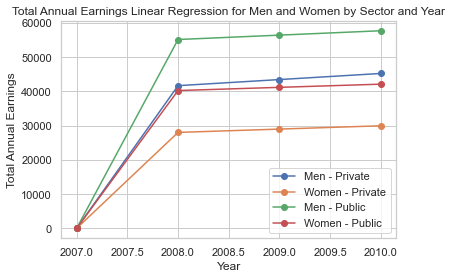

In [22]:
apm = mpm.predict(X_private_male)
apf = mpf.predict(X_private_female)

apum = mpum.predict(X_public_male)
apuf = mpuf.predict(X_public_female)


year = [2007, 2008, 2009, 2010]
vmp = [0] + apm.tolist()
vfp = [0] + apf.tolist()
vmpu = [0] + apum.tolist()
vfpu = [0] + apuf.tolist()

plt.plot(year, vmp, marker='o', label='Men - Private')
plt.plot(year, vfp, marker='o', label='Women - Private')
plt.plot(year, vmpu, marker='o', label='Men - Public')
plt.plot(year, vfpu, marker='o', label='Women - Public')

plt.xlabel('Year')
plt.ylabel('Total Annual Earnings')
plt.title('Total Annual Earnings Linear Regression for Men and Women by Sector and Year')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def plot_mean_annual_earnings(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    pivot_table_private = dft[dft['Private or Public Sector'] == 'Private sector'].pivot_table(
        index='Year', columns=['Statistic Label', 'Sex'], values='VALUE', aggfunc='mean')
    pivot_table_private.columns = pivot_table_private.columns.map('{0[0]} - {0[1]}'.format)
    sns.lineplot(data=pivot_table_private, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Private Sector')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')

    
    plt.subplot(1, 2, 2)
    pivot_table_public = dft[dft['Private or Public Sector'] == 'Public sector'].pivot_table(
        index='Year', columns=['Statistic Label', 'Sex'], values='VALUE', aggfunc='mean')
    pivot_table_public.columns = pivot_table_public.columns.map('{0[0]} - {0[1]}'.format)
    sns.lineplot(data=pivot_table_public, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Public Sector')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')

    plt.tight_layout()
    plt.show()

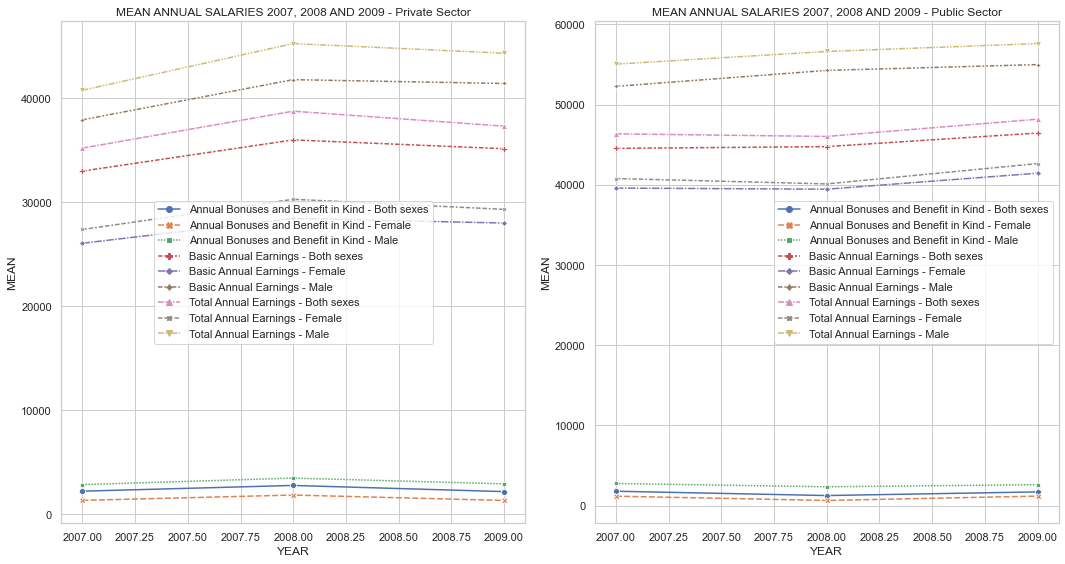

In [24]:
plot_mean_annual_earnings(df1)

In [25]:
def plot_annual_earnings(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    pivot_table_private = dft[dft['Private or Public Sector'] == 'Private sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    pivot_table_private.plot(kind='bar', rot=45, width=0.8, colormap='Paired', ax=plt.gca())
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Private Sector')
    plt.xlabel('YEAR / STATISTIC LABEL', fontsize=10)  
    plt.ylabel('MEAN')

    
    plt.subplot(1, 2, 2)
    pivot_table_public = dft[dft['Private or Public Sector'] == 'Public sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    pivot_table_public.plot(kind='bar', rot=45, width=0.8, colormap='Paired', ax=plt.gca())
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Public Sector')
    plt.xlabel('YEAR / STATISTIC LABEL', fontsize=10)  
    plt.ylabel('MEAN')

    plt.tight_layout()
    plt.show()

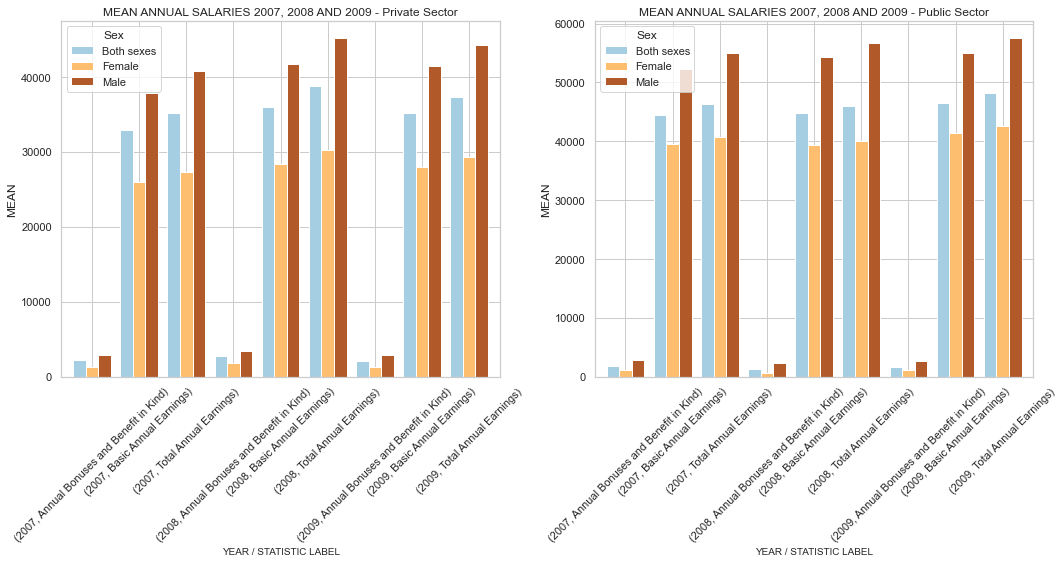

In [26]:
plot_annual_earnings(df1)

## Inferential statistics

In [27]:
private_sector = df1[df1['Private or Public Sector'] == 'Private sector']
public_sector = df1[df1['Private or Public Sector'] == 'Public sector']

def t_test(data, sector_label, statistic_label, alpha=0.05):
    male_data = data[(data['Sex'] == 'Male') & (data['Statistic Label'] == statistic_label)]
    female_data = data[(data['Sex'] == 'Female') & (data['Statistic Label'] == statistic_label)]

    t_statistic, p_value = ttest_ind(male_data['VALUE'], female_data['VALUE'])

    print(f"Sector: {sector_label}")
    print(f"Statistic Label: {statistic_label}")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print("Result is statistically significant at the chosen level of significance.")
    else:
        print("Result is not statistically significant at the chosen level of significance.")
    print("")

for statistic_label in df1['Statistic Label'].unique():
    t_test(private_sector, 'Private sector', statistic_label, alpha=0.05)
    t_test(public_sector, 'Public sector', statistic_label, alpha=0.05)

Sector: Private sector
Statistic Label: Basic Annual Earnings
Test Statistic: 8.986843441032876
P-value: 0.0008485893765422326
Result is statistically significant at the chosen level of significance.

Sector: Public sector
Statistic Label: Basic Annual Earnings
Test Statistic: 13.217146471643998
P-value: 0.0001893241302790999
Result is statistically significant at the chosen level of significance.

Sector: Private sector
Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 6.00599708846592
P-value: 0.0038683456333966047
Result is statistically significant at the chosen level of significance.

Sector: Public sector
Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 7.278187932122567
P-value: 0.0018935911584615445
Result is statistically significant at the chosen level of significance.

Sector: Private sector
Statistic Label: Total Annual Earnings
Test Statistic: 8.95900751303585
P-value: 0.0008587637534402128
Result is statistically significant at the cho

In [28]:
private_sector = df1[df1['Private or Public Sector'] == 'Private sector']
public_sector = df1[df1['Private or Public Sector'] == 'Public sector']

def perform_t_test(data, sector_label, statistic_label):
    male_data = data[(data['Sex'] == 'Male') & (data['Statistic Label'] == statistic_label)]
    female_data = data[(data['Sex'] == 'Female') & (data['Statistic Label'] == statistic_label)]

    t_statistic, p_value = ttest_ind(male_data['VALUE'], female_data['VALUE'])

    print(f"Sector: {sector_label}")
    print(f"Statistic Label: {statistic_label}")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("")


for statistic_label in df1['Statistic Label'].unique():
    perform_t_test(private_sector, 'Private sector', statistic_label)
    perform_t_test(public_sector, 'Public sector', statistic_label)

Sector: Private sector
Statistic Label: Basic Annual Earnings
Test Statistic: 8.986843441032876
P-value: 0.0008485893765422326

Sector: Public sector
Statistic Label: Basic Annual Earnings
Test Statistic: 13.217146471643998
P-value: 0.0001893241302790999

Sector: Private sector
Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 6.00599708846592
P-value: 0.0038683456333966047

Sector: Public sector
Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 7.278187932122567
P-value: 0.0018935911584615445

Sector: Private sector
Statistic Label: Total Annual Earnings
Test Statistic: 8.95900751303585
P-value: 0.0008587637534402128

Sector: Public sector
Statistic Label: Total Annual Earnings
Test Statistic: 14.336021256182285
P-value: 0.00013755578996650045



# DATASET 2

## Average monthly earnings of employees by sex and economic activity

In [29]:
#IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset = pd.read_csv('EAR_4MTH_SEX_ECO_CUR_NB_A-filtered-2023-07-14.csv')
dataset.head(5)

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2021,4321.55,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
1,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: 2017 PPP $,2021,5539.05,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
2,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2021,5111.28,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
3,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Agriculture,Currency: Local currency,2021,3394.12,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
4,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Agriculture,Currency: 2017 PPP $,2021,4350.33,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


## EDA

In [31]:
dataset.shape

(9443, 12)

In [32]:
dataset.isnull().sum()

ref_area.label             0
indicator.label            0
source.label               0
sex.label                  0
classif1.label             0
classif2.label             0
time                       0
obs_value                  0
obs_status.label        9443
note_classif.label      8447
note_indicator.label       0
note_source.label       2043
dtype: int64

In [33]:
df = dataset.drop('obs_status.label', axis= 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9443 entries, 0 to 9442
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        9443 non-null   object 
 1   indicator.label       9443 non-null   object 
 2   source.label          9443 non-null   object 
 3   sex.label             9443 non-null   object 
 4   classif1.label        9443 non-null   object 
 5   classif2.label        9443 non-null   object 
 6   time                  9443 non-null   int64  
 7   obs_value             9443 non-null   float64
 8   note_classif.label    996 non-null    object 
 9   note_indicator.label  9443 non-null   object 
 10  note_source.label     7400 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 811.6+ KB


In [35]:
df.columns = df.columns.str.replace('.label', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9443 entries, 0 to 9442
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area        9443 non-null   object 
 1   indicator       9443 non-null   object 
 2   source          9443 non-null   object 
 3   sex             9443 non-null   object 
 4   classif1        9443 non-null   object 
 5   classif2        9443 non-null   object 
 6   time            9443 non-null   int64  
 7   obs_value       9443 non-null   float64
 8   note_classif    996 non-null    object 
 9   note_indicator  9443 non-null   object 
 10  note_source     7400 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 811.6+ KB


In [36]:
def get_unique(df, n_max = 32):
  for col in df.columns:
    print('-----------------')
    print(f'COLUMN: {col}')
    Value = df[col].unique()

    if len(Value) < n_max:
      for v in Value:
        print(f'  > {v}')

    else:
      print(f'  > More than {n_max} ({len(Value)} values)')

In [37]:
get_unique(df = df, n_max = 32)

-----------------
COLUMN: ref_area
  > Germany
  > France
  > Croatia
  > Ireland
  > Italy
  > Netherlands
-----------------
COLUMN: indicator
  > Average monthly earnings of employees by sex and economic activity
-----------------
COLUMN: source
  > HIES - EU Statistics on Income and Living Conditions
  > ES - Structure of Earnings Survey
  > LFS - Employment Survey
  > ES - Labour cost and Structure of Earnings annual Survey
  > ADM - Annual Statement of Social Data
  > ES - Annual Survey on persons in paid employment and gross and net Earnings
  > ES - Earnings Hours and Employment Costs Survey
  > ES - Labour-related Establishment Survey
-----------------
COLUMN: sex
  > Sex: Total
  > Sex: Male
  > Sex: Female
-----------------
COLUMN: classif1
  > Economic activity (Aggregate): Total
  > Economic activity (Aggregate): Agriculture
  > Economic activity (Aggregate): Manufacturing
  > Economic activity (Aggregate): Construction
  > Economic activity (Aggregate): Trade, Transportati

In [38]:
df['sex'] = df['sex'].apply(lambda x: pd.Series(x.split(': ')))[1]
df['classif2'] = df['classif2'].apply(lambda x: pd.Series(x.split(': ')))[1]
df[['classif1', 'sector']]= df['classif1'].apply(lambda x: pd.Series(x.split(': ')))

df.head(1)

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source,sector
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,4321.55,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Total


In [39]:
df.classif2.unique()

array(['Local currency', '2017 PPP $', 'U.S. dollars'], dtype=object)

In [40]:
df.sex.unique()

array(['Total', 'Male', 'Female'], dtype=object)

In [41]:
#cleaning data
df_2 = df[(df['classif2'] == 'Local currency') & (df['classif1'] == 'Economic activity (Aggregate)') & (df['ref_area'] != 'Croatia')]
df_2 = df_2.reset_index(drop=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area        577 non-null    object 
 1   indicator       577 non-null    object 
 2   source          577 non-null    object 
 3   sex             577 non-null    object 
 4   classif1        577 non-null    object 
 5   classif2        577 non-null    object 
 6   time            577 non-null    int64  
 7   obs_value       577 non-null    float64
 8   note_classif    75 non-null     object 
 9   note_indicator  577 non-null    object 
 10  note_source     547 non-null    object 
 11  sector          577 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 54.2+ KB


In [42]:
df_2[:2]

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source,sector
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,4321.55,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Total
1,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,3394.12,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Agriculture


In [43]:
def get_dados (df, year = 2007) :
 df = df[df['time'] == year]

 print (f'Year: {year}')
 print(' ')


 for c in df['ref_area'].unique():
  print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
  print(f'Country: {c}')
  for s in df['sector'].unique():

    error = 0

    print(f'  > {s}')
    dff = df[(df['ref_area'] == c) & (df['sector'] == s) ]

    try:
      m_value =   dff[dff['sex'] == 'Male']['obs_value'].values[0]

    except:
      print(f"      > Error on 'Male' filter")
      error = 1

    try:
      f_value =   dff[dff['sex'] == 'Female']['obs_value'].values[0]

    except:
      print(f"      > Error on 'Female' filter")
      error = 1

    if error == 0:

      dif_m_f = f_value - m_value
      perc_m_f = (f_value / m_value) - 1

      print(f"      > Female: {f_value :,.0f}")
      print(f"      > Male: {m_value:,.0f}")
      print(f"      > Dif : {dif_m_f:,.0f}")
      print(f"      > Perc : {perc_m_f:,.2%}")


In [44]:
get_dados(df_2,2021 )

Year: 2021
 
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Country: Germany
  > Total
      > Female: 3,424
      > Male: 5,113
      > Dif : -1,689
      > Perc : -33.03%
  > Agriculture
      > Female: 2,744
      > Male: 3,686
      > Dif : -941
      > Perc : -25.54%
  > Manufacturing
      > Female: 4,067
      > Male: 5,562
      > Dif : -1,495
      > Perc : -26.88%
  > Construction
      > Female: 2,886
      > Male: 4,089
      > Dif : -1,203
      > Perc : -29.43%
  > Trade, Transportation, Accommodation and Food, and Business and Administrative Services
      > Female: 3,242
      > Male: 5,038
      > Dif : -1,797
      > Perc : -35.66%
  > Public Administration, Community, Social and other Services and Activities
      > Female: 3,425
      > Male: 5,029
      > Dif : -1,604
      > Perc : -31.90%
  > Not classified
      > Female: 2,235
      > Male: 5,263
      > Dif : -3,027
      > Perc : -57.53%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Country: Fr

In [45]:
def get_dados_c(df, year = 2007):
  df = df[df['time'] == year] #filtrando o dataframe

  print (f'Year: {year}')
  print(' ')

  for s in df['sector'].unique():
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print(f'{s}')
    for c in df['ref_area'].unique():

      error = False  #assumiu a var erro como zero

      dff = df[(df['ref_area'] == c) & (df['sector'] == s)] #filtro de país e setor

      try:
        m_value =   dff[dff['sex'] == 'Male']['obs_value'].values[0] # tenta pegar o valor do homem

      except:
        print(f"      > {c} : Error on 'Male' filter")
        error = True # encontrou um erro

      try:
        f_value =   dff[dff['sex'] == 'Female']['obs_value'].values[0] # tentar pegar o valor da mulher

      except:
        print(f"      > {c} : Error on 'Female' filter")
        error = True # erro encontrado

      if error == False: #verifica se houve um erro
        perc_m_f = (f_value / m_value) - 1

        print(f"      > {c} : {perc_m_f:,.2%}")

In [46]:
get_dados_c(df_2, 2021)

Year: 2021
 
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Total
      > Germany : -33.03%
      > France : -28.38%
      > Ireland : -26.92%
      > Italy : -22.75%
      > Netherlands : -29.87%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Agriculture
      > Germany : -25.54%
      > France : -27.53%
      > Ireland : 36.82%
      > Italy : -17.98%
      > Netherlands : -34.02%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Manufacturing
      > Germany : -26.88%
      > France : -15.51%
      > Ireland : -21.08%
      > Italy : -15.46%
      > Netherlands : -26.96%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Construction
      > Germany : -29.43%
      > France : 4.32%
      > Ireland : -12.05%
      > Italy : 0.10%
      > Netherlands : -28.96%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Trade, Transportation, Accommodation and Food, and Business and Administrative Services
      > Germany : -35.66%
      > France : -26.29%
      > Irelan

## Inferential statistics

In [47]:
df_c = df_2.pivot_table(values='obs_value', index=['time', 'ref_area', 'sector'], columns=['sex'])

df_c = df_c.reset_index(drop = False)

df_c.sample(20)

sex,time,ref_area,sector,Female,Male,Total
12,2011,Italy,"Public Administration, Community, Social and o...",2626.77,3623.94,3013.88
165,2020,Netherlands,Manufacturing,3910.38,5872.87,5423.84
1,2011,Germany,Agriculture,937.71,1751.06,1429.24
115,2017,Netherlands,Manufacturing,3277.16,5468.76,5027.49
48,2013,Germany,Manufacturing,2179.74,3432.71,3098.55
136,2019,Germany,"Trade, Transportation, Accommodation and Food,...",2251.07,3627.69,2945.70
180,2021,Germany,Not classified,2235.15,5262.60,3739.98
66,2013,Netherlands,Total,3065.62,4696.01,3940.75
107,2017,Germany,Manufacturing,2654.97,3829.92,3545.28
82,2015,Netherlands,Construction,3168.27,4389.91,4287.78


## Calculation of Confidence Intervals

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [49]:
def confidence_int(df, value_col, conf_level = 0.95):

  #getting list from df
  data = df[value_col].values

  #mean and standard deviation
  data_mean = np.mean(data)
  data_std = np.std(data, ddof=1)

  # Degrees of freedom
  d_free = len(data) - 1

  # Critical value
  crit_val = norm.ppf((1 + conf_level) / 2)

  # Margin of error
  moe = crit_val * data_std / np.sqrt(len(data))

  # Confidence interval
  conf_int = (data_mean - moe, data_mean + moe)


  d = df[value_col]

  print('max: ', d.max())
  print('min: ', d.min())
  print('Median: ', d.median())
  print("Mean: ", data_mean)
  print('Variance: ', np.var(d))
  print("Standard Deviation: ", data_std)
  print(f"Confidence interval ({conf_level:.0%}): ", conf_int)
  print("Skewness: ",  d.skew())
  print("Kurtosis: ",  d.kurt())

  sns.distplot(d);

max:  4370.74
min:  888.94
Median:  2598.9449999999997
Mean:  2654.9274193548385
Variance:  512119.91758903896
Standard Deviation:  717.5570593059417
Confidence interval (95%):  (2551.8061951081386, 2758.0486436015385)
Skewness:  0.12707716989520396
Kurtosis:  -0.5655935035078294


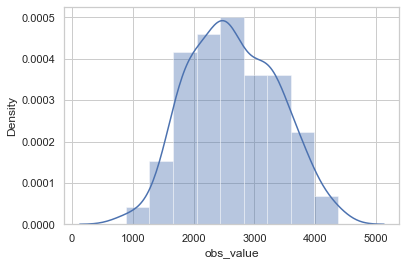

In [50]:
confidence_int(df = df_2[df_2['sex'] == 'Female'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  5966.34
min:  1491.78
Median:  3570.41
Mean:  3778.1567914438506
Variance:  1111714.950599331
Standard Deviation:  1057.2094932885002
Confidence interval (95%):  (3626.6303786308176, 3929.6832042568835)
Skewness:  0.05086925026311036
Kurtosis:  -0.8713470662569103


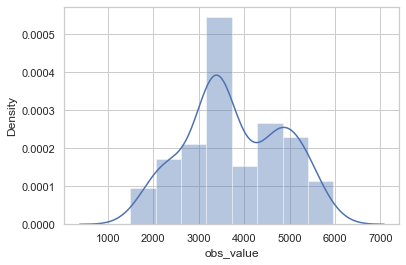

In [51]:
confidence_int(df = df_2[df_2['sex'] == 'Male'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  5541.41
min:  1429.24
Median:  3091.275
Mean:  3270.154460784314
Variance:  815422.1866560818
Standard Deviation:  905.2287250846755
Confidence interval (95%):  (3145.934515384743, 3394.3744061838847)
Skewness:  0.2979996165275309
Kurtosis:  -0.4935857218973543


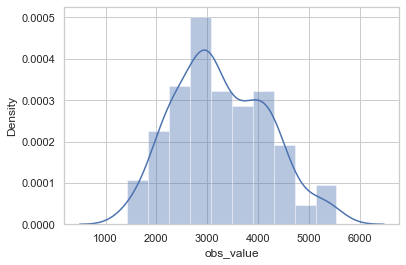

In [52]:
confidence_int(df = df_2[df_2['sex'] == 'Total'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  4370.74
min:  2980.46
Median:  3441.915
Mean:  3537.778333333333
Variance:  195168.94494722216
Standard Deviation:  483.9449699466527
Confidence interval (95%):  (3150.548823844949, 3925.0078428217175)
Skewness:  0.9978766958890816
Kurtosis:  1.2480885800209052


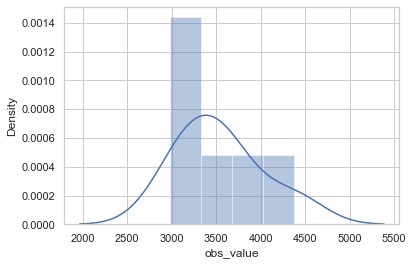

In [53]:
confidence_int(df = df_2[(df_2['ref_area'] == 'Ireland') & (df_2['sex'] == 'Female')],
               value_col = 'obs_value',
               conf_level = 0.95)

In [54]:
print(df_2.columns)

Index(['ref_area', 'indicator', 'source', 'sex', 'classif1', 'classif2',
       'time', 'obs_value', 'note_classif', 'note_indicator', 'note_source',
       'sector'],
      dtype='object')


In [55]:
def anova(df, value_col, year):
    anos = df[year].unique()
    dados_por_ano = []
    for ano in anos:
        dados = df[df[year] == ano][value_col].values
        dados_por_ano.append(dados)

    # Realizando o teste de ANOVA
    resultado_anova = f_oneway(*dados_por_ano)

    # Imprimindo o resultado
    print("Resultado do teste ANOVA:")
    print("Estatística F:", resultado_anova.statistic)
    print("Valor-p:", resultado_anova.pvalue)

In [56]:
anova(df=df_2, value_col='obs_value', year='time')

Resultado do teste ANOVA:
Estatística F: 6.763779031037587
Valor-p: 5.423295444765436e-10


In [57]:
df_c.head(10)

sex,time,ref_area,sector,Female,Male,Total
0,2011,France,Total,2469.00,3011.00,2787.00
1,2011,Germany,Agriculture,937.71,1751.06,1429.24
2,2011,Germany,Construction,1569.06,2363.65,2246.06
3,2011,Germany,Manufacturing,2267.78,3238.50,2986.39
4,2011,Germany,"Public Administration, Community, Social and o...",1897.45,3109.09,2342.94
5,2011,Germany,Total,1855.81,3048.35,2486.44
6,2011,Germany,"Trade, Transportation, Accommodation and Food,...",1716.82,3044.77,2368.98
7,2011,Ireland,Total,NaN,NaN,3015.60
8,2011,Italy,Agriculture,1772.32,2166.67,2017.59
9,2011,Italy,Construction,2683.41,2713.64,2710.58


In [58]:
df_c['ref_area'] == 'Ireland'

0      False
1      False
2      False
3      False
4      False
       ...  
199    False
200    False
201    False
202    False
203    False
Name: ref_area, Length: 204, dtype: bool

In [59]:
correlacoes = df_c[['Total', 'ref_area', 'sector']].corr()

# Imprimir as correlações
print(correlacoes)

sex    Total
sex         
Total    1.0


In [60]:
# Calcular o coeficiente de correlação de Spearman entre as colunas numéricas (Female e Male)
correlacoes_spearman = df_c[['Female', 'Male']].corr(method='spearman')

# Imprimir as correlações de Spearman
print(correlacoes_spearman)

sex       Female      Male
sex                       
Female  1.000000  0.860558
Male    0.860558  1.000000


In [61]:
# Group the data by 'ref_area' and calculate the correlation for 'Female' and 'Male'
df_corr = df_c.groupby('ref_area')[['Female', 'Male']].corr().reset_index()

# Rename the 'Male' column to 'Corr_Male' and 'Female' column to 'Corr_Female'
df_corr.rename(columns={'Male': 'Corr_Male', 'Female': 'Corr_Female'}, inplace=True)

# Merge the correlation dataframes
df_with_corr = df.merge(df_corr[['ref_area', 'Corr_Male', 'Corr_Female']], on='ref_area', how='left')

# The resulting DataFrame 'df_with_corr' will have the correlations for 'Female' and 'Male' as additional columns 'Corr_Female' and 'Corr_Male', respectively, for each 'ref_area'.




In [62]:
df_corr.sample

<bound method NDFrame.sample of sex     ref_area     sex  Corr_Female  Corr_Male
0         France  Female     1.000000   0.883050
1         France    Male     0.883050   1.000000
2        Germany  Female     1.000000   0.902733
3        Germany    Male     0.902733   1.000000
4        Ireland  Female     1.000000   0.805059
5        Ireland    Male     0.805059   1.000000
6          Italy  Female     1.000000   0.782050
7          Italy    Male     0.782050   1.000000
8    Netherlands  Female     1.000000   0.837018
9    Netherlands    Male     0.837018   1.000000>